# Tugas CNN (Convolutional Neural Network)
### Nama Anggota Kelompok
1. Fadel Pramaputra Maulana     5025201260
2. Muhammad Lintang Panjerino   5025201045
3. Fitra Agung Diassyah Putra   5025201072
4. Mohammad Nouval Bachrezi     5025201030

### Datasets
https://www.cs.toronto.edu/~kriz/cifar.html

In [5]:
# menyiapkan library yang dibutuhkan

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [12]:
# menyiapkan data yang dibutuhkan
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()
print(X_train.shape)
print(X_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [7]:
# melakukan reshap y_train menjadi 1d array karena data merupakan index dari masing masing class gambar data
y_train = y_train.reshape(-1,)
y_train

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [8]:
# mendefinisikan class
classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

In [9]:
# membagi training sample dan testing sample dengan 255 (based on RGB value) untuk normalized data
X_train = X_train/255
X_test = X_test/255

In [21]:
# membuat model cnn
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# menggunakan sparse karena nilai dari y_train dan y_test bukan merupakan binary classification
# melainkan merupakan index value
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
              
# menggunakan 20 epochs
history = cnn.fit(X_train, y_train, epochs=20)

Epoch 1/20
1563/1563 [==============================] - 16s 10ms/step - loss: 1.7994 - accuracy: 0.3964
Epoch 2/20
1563/1563 [==============================] - 16s 10ms/step - loss: 1.2968 - accuracy: 0.5399
Epoch 3/20
1563/1563 [==============================] - 16s 10ms/step - loss: 1.1384 - accuracy: 0.6018
Epoch 4/20
1563/1563 [==============================] - 16s 10ms/step - loss: 1.0374 - accuracy: 0.6432
Epoch 5/20
1563/1563 [==============================] - 16s 10ms/step - loss: 0.9612 - accuracy: 0.6700
Epoch 6/20
1563/1563 [==============================] - 16s 10ms/step - loss: 0.9008 - accuracy: 0.6915
Epoch 7/20
1563/1563 [==============================] - 16s 10ms/step - loss: 0.8424 - accuracy: 0.7113
Epoch 8/20
1563/1563 [==============================] - 16s 10ms/step - loss: 0.7956 - accuracy: 0.7294
Epoch 9/20
1563/1563 [==============================] - 16s 10ms/step - loss: 0.7539 - accuracy: 0.7443
Epoch 10/20
1563/1563 [==============================] - 16s 10m

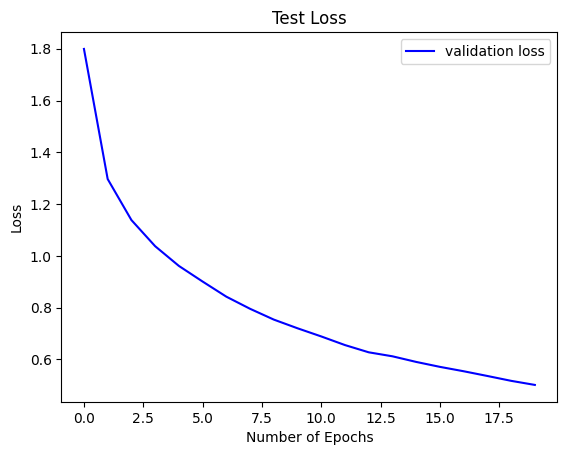

In [22]:
# dapat dilihat dari plotingan dibawah semakin banyak epochs maka data akan semakin akurat
plt.plot(history.history['loss'], color='b', label="validation loss")
plt.title("Test Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [23]:
# evaluasi akurasi dan loss
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 1.4570 - accuracy: 0.6431


[1.4570292234420776, 0.6431000232696533]

In [24]:
# data akurasi per class
from sklearn.metrics import classification_report
import numpy as np
y_pred = cnn.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print(classification_report(y_test, y_pred_classes))

313/313 [==============================] - 1s 4ms/step
              precision    recall  f1-score   support

           0       0.65      0.74      0.69      1000
           1       0.83      0.72      0.77      1000
           2       0.53      0.55      0.54      1000
           3       0.47      0.36      0.41      1000
           4       0.55      0.56      0.56      1000
           5       0.52      0.60      0.56      1000
           6       0.69      0.75      0.72      1000
           7       0.70      0.69      0.70      1000
           8       0.76      0.73      0.75      1000
           9       0.74      0.74      0.74      1000

    accuracy                           0.64     10000
   macro avg       0.64      0.64      0.64     10000
weighted avg       0.64      0.64      0.64     10000



In [27]:
# melakukan testing, menggunakan 10 data pertama
n_test = 10
y_pred = cnn.predict(X_test)
y_classes = [np.argmax(val) for val in y_pred]
print("10 data X_test menghasilkan y_pred berikut\n", y_classes[:n_test])

313/313 [==============================] - 1s 4ms/step
10 data X_test menghasilkan y_pred berikut
 [3, 1, 0, 0, 6, 6, 6, 6, 3, 9]


In [28]:
y_test = y_test.reshape(-1,)
print("10 data y_test sesungguhnya\n", y_test[:n_test])

10 data y_test sesungguhnya
 [3 8 8 0 6 6 1 6 3 1]


cnn y = frog
actual y = frog


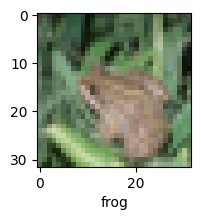

In [30]:
# testing
# pada index 1 hasil y_pred sesuai dengan y_test
index = 4

plt.figure(figsize=(15,2))
plt.imshow(X_test[index])
plt.xlabel(classes[y_test[index]])

print("cnn y =", classes[y_test[index]])
print("actual y =", classes[y_classes[index]])

actual y = automobile
cnn y = frog


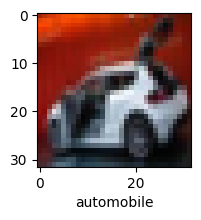

In [35]:
# testing
# pada index 6 hasil y_pred tidak sesuai dengan y_test
index = 6

plt.figure(figsize=(15,2))
plt.imshow(X_test[index])
plt.xlabel(classes[y_test[index]])

print("actual y =", classes[y_test[index]])
print("cnn y =", classes[y_classes[index]])